In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/mohd/Desktop/data/train.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(df)

8921483

## Functions

In [4]:
def appendToDict(dic, series):
    indices = series.index
    for i in indices:
        dic[i] = dic.get(i, [])
        dic[i].append(series[i])
    
    return dic

def printPercentages(d, title):
    currentStr = "[[{}]]".format(title)
    for k, v in d.items():
        try:
            currentStr += "\n{}: {:.2f}%".format(k, v[1]/v[0])
        except:
            currentStr += "\n{}: {:.2f}%".format(k, 0)
    
    return currentStr
            
def calculateAllPercentages(df):
    tot = {}
    cols = list(df.columns)
    cols.remove('MachineIdentifier')
    for col in cols:
        before = df[col].value_counts()
        d = appendToDict({}, before)

        after = df[col][df["HasDetections"] == 1].value_counts()
        d = appendToDict(d, after)
        
        tot[col] = d
    
    return tot

## Calculate malware percentages for each column

In [5]:
tot = calculateAllPercentages(df)

In [6]:
f = open("output.txt", "w+")
for i in tot:
    f.write(printPercentages(tot[i], "{}".format(i)))
    f.write("\n=====================\n")

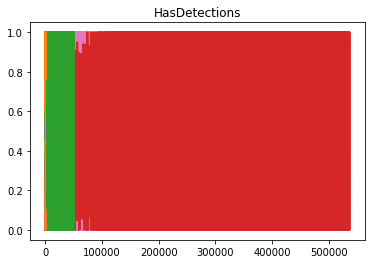

In [27]:
map_dict = {}
for title in tot:
    index = 0
    map_index_val = {}
    x = []
    y = []
    for i in tot[title]:
        x.append(index)
        try:
            
            y.append(tot[title][i][1]/tot[title][i][0])
        except:
            y.append(0)
        index += 1
    map_dict[title] = map_index_val
    plt.title(title)
    plt.plot(x, y)
    plt.savefig("plots/{}.png".format(title))

In [ ]:
df